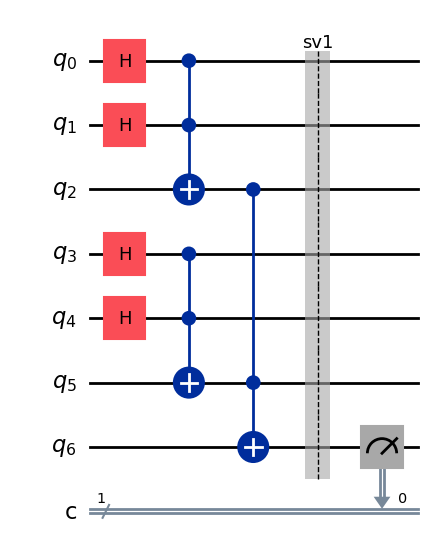

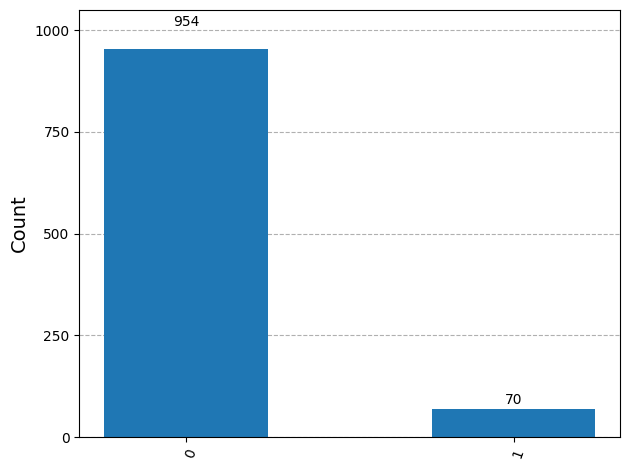

In [2]:
"""quantum_circuit3.ipynb"""

# Cell 01

from IPython.display import display
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import (
    plot_histogram,
)
from qiskit_aer import AerSimulator

qc = QuantumCircuit(7, 1)

# To implement this circuit, first carry out 4 Hadamard gates
# then 2 CCNOT gates, then one final CCNOT gate
# Save the statevector afterwards, and finally measure qubit 6
qc.h(0)
qc.h(1)
qc.h(3)
qc.h(4)
qc.ccx(0, 1, 2)
qc.ccx(3, 4, 5)
qc.ccx(2, 5, 6)
qc.save_statevector("sv1")
qc.measure(6, 0)

# Display the circuit to confirm it matches the goal
display(qc.draw(output="mpl"))

# Carry out simulation with 1_024 shots
backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled, shots=1_024).result()

# Save that statevector, I'm not going to display it because it has 64 elements
sv1 = result.data(0)["sv1"]

# Display a histogram of the counts
counts = result.get_counts(qc)
display(plot_histogram(counts))


Consider the probability of Qubit 6 receiving an excitation. The only way is for qubit 2 and qubit 5 to both have an excitation before the CCNOT gate between qubits 2, 5, and 6. Thus we can express qubit 6's probability as the product of 2 and 5's probabilities:
$$ P_6 = P_2 P_5 \\ $$ 
Qubits 2 and 5 are both subject to CCNOT gates as well, and their control qubits are all in 50/50 super position after Hadamard gates. So what is the probability that each of those qubits is excited? Same as qubit 6:
$$ P_2 = P_0 P_1 \text{ and } P_5 = P_3 P_4 \\ $$ 
Given that qubits 0, 1, 3, and 4 are subject to Hadamard gates, the probability that each one of them is carrying an excitation is $\frac{1}{2}$. $\\$
Thus:
$$ P_2 = \Big(\frac{1}{2}\Big)^2 = P_5 $$
$$ P_6 = \Big(\frac{1}{2}\Big)^4 = \frac{1}{16} $$